In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
spec = pd.read_table("./qui.txt",sep='\s+',header=None)
spec.head()

,0,1
0,100.699997,0.0
1,101.599998,0.0
2,102.500000,0.0
3,103.400002,0.0
4,104.299995,0.0


/Users/cpacifici/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


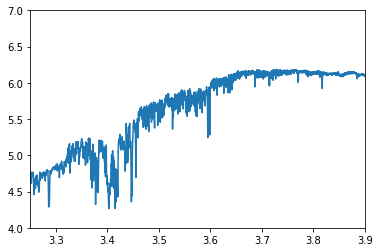

In [7]:
plt.plot(np.log10(spec[0]),np.log10(spec[1]))
plt.xlim(3.25,3.9)
plt.ylim(4,7)
plt.show()

/Users/cpacifici/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/cpacifici/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


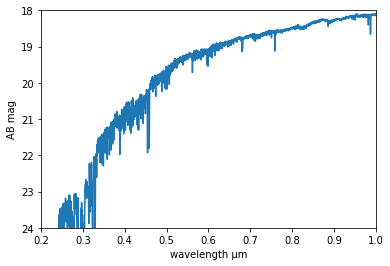

In [11]:
z=0.156
dist=739.73 #in Mpc

#shift to observer frame
lamz=spec[0]*(1.+z)
sedz=spec[1]/(1.+z)

#convert from solar luminosity to flux_lambda
convdist=(3.84/(4.*3.14*(dist*3.08)**2))*1E-15
seddist=sedz*convdist

#convert from flux_lambda to flux_nu (use log for computation)
sedfnu=np.log10(seddist)+np.log10((lamz**2)/(2.998)) -18.

#convert from flux_nu in erg/s/cm^2/Hz to mJy (and go back to linear)
sedmjy=sedfnu + 23. +3.
sedmjy=10**sedmjy

#plot in magnitudes and lambda in um
lamout = lamz/10000.
sedout = -2.5*np.log10(sedmjy)+16.4

plt.plot(lamout,sedout)
plt.xlim(0.2,1)
plt.ylim(24,18)
plt.xlabel('wavelength µm')
plt.ylabel('AB mag')
plt.show()